keras imports for the dataset and building our neural network

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt 

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import tensorflow as tf
from keras import utils
from tensorflow.keras.utils import to_categorical  # Specific function you need
from sklearn.metrics import accuracy_score
import pandas as pd

loading the dataset

In [7]:
Train_set = pd.read_csv("emnist\emnist-letters-train.csv")
Test_set =  pd.read_csv("emnist\emnist-letters-test.csv")


In [8]:
Train_set.shape, Test_set.shape

((88799, 785), (14799, 785))

# All input data for  keras and tensorflow, must be in 3 dimensional data

building the input vector from the 28x28 pixels

In [9]:
#training_letters
X_train = np.array(Train_set.iloc[:,1:].values)
y_train = np.array(Train_set.iloc[:,0].values)

#testing_labels
X_test = np.array(Test_set.iloc[:,1:].values)
y_test = np.array(Test_set.iloc[:,0].values)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((88799, 784), (88799,), (14799, 784), (14799,))

# Plot sample of images

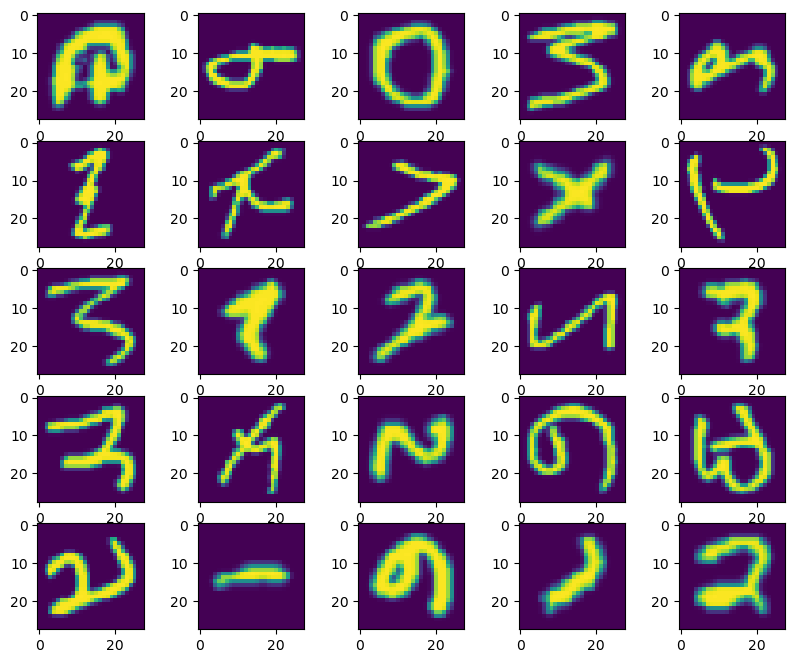

In [10]:
fig,axes = plt.subplots(5,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape([28,28]))


# Preprocesssing
## 1. Normalisation and reshaping of data
    Before feeding in the data to the model we will normalise and reshape the data given to us. This will decrease the complexity of the models and make the model work efficiently as less complex numbers will be there to process.

one-hot encoding using keras' numpy-related utilities

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')




In [ ]:
print(np.unique(y_train))

In [ ]:
n_classes = 47
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:

model = Sequential()

# convolutional layer   - 
# ConvD(25 neurons)
#kernel_size 3,3 = filter size =  3xx
# strides =  how many square move by time  =   1 by on
# padding = Valid
# Activation function = relu  -  check ann to understand each activation function
# input_shate =  size of 3d picture (28x28x1

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# 
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())

# hidden layer
# Deense with 100 neurons   -activation relu -  check why not sigmoid
model.add(Dense(100, activation='relu'))


# output layer
#47 - the numbers from 0 to 9  and letters A-Z,  and actication softmax
model.add(Dense(48, activation='softmax'))

compiling the sequential model

In [ ]:

# Its a multiple categorical ,  so we user categorical_crossentropy as  less function.
# optimizaer adam

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

training the model for 10 epochs

In [ ]:
# Batch_size = get 128 data with and pass for the model 10 times (epochs)

model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Save the model to disk.

In [ ]:
model.save_weights('cnn_B.h5')

Load the model from disk using later:

In [ ]:
model.load_weights('cnn_B.h5')

Predict on the first 5 test images.

In [ ]:
predictions = model.predict(X_test [:10]) 


Print our model's predictions.

In [ ]:
print(np.argmax(predictions, axis=1))

Check our predictions against the ground truths.

In [ ]:
print(y_test[:10]) 